In [1]:
# Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('50_Startups.csv')

In [3]:
# Display basic info
print("First 5 rows:\n", df.head())
print("\nData Summary:\n", df.describe())
print("\nInfo:\n")
print(df.info())

First 5 rows:
    R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Data Summary:
            R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max

In [4]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [5]:
# Encoding categorical column 'State'
le_state = LabelEncoder()
df['State'] = le_state.fit_transform(df['State'])
print("\nEncoded 'State' column:\n", df['State'].unique())


Encoded 'State' column:
 [2 0 1]


In [6]:
# Feature Selection
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Prediction
y_pred = model.predict(X_test)

In [10]:
# Evaluation
print("\nEvaluation Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Evaluation Metrics:
Mean Squared Error: 80929465.49097753
R² Score: 0.9000614254946406


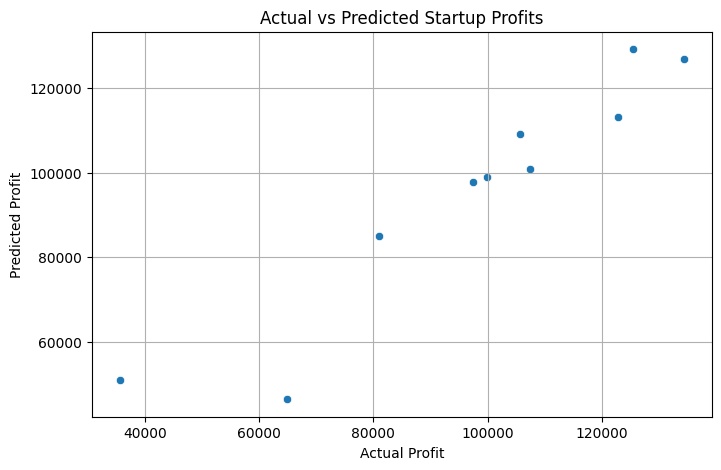

In [11]:

# Plotting Actual vs Predicted Profits
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
#plt.scatter(x=y_test, y=y_pred,color="blue")
#plt.plot(X, y_pred, color='red')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Startup Profits")
plt.grid(True)
plt.show()
